# Topic 37: Intro to Time Series

- 05/27/21
- onl01-dtsc-ft-022221

## Learning Objectives:

- Learn how to load in timeseries data into pandas
- Learn how to plot timeseries in pandas
- Learn how to resample at different time frequencies
- Learn about types of time series trends and how to remove them.
- Learn about seasonal decomposition

- Prepare a time series dataset to use for modeling next class

## Questions?

# Intro to Time Series

## References

- [Pandas Timeseries Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- ['Timeseries Offset Aliases'](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
- [Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

# Working with Time Series

In [1]:
## Import the essentials
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import os,sys


## Setting figures to timeseries-friendly
mpl.rcParams['figure.figsize'] = (12,4)
# sns.set_context('talk')

# import warnings
# warnings.filterwarnings('ignore')

## Time Series Tools from statsmodels
import statsmodels.tsa.api as tsa
import statsmodels
print(f'Statsmodels version = {statsmodels.__version__}')


Statsmodels version = 0.12.2


## Creating a Time Series from a DataFrame

### Data is from Baltimore's Open-Data Portal

- New Crime Stats Just downloaded:
- [Baltimore Open Data](https://www.baltimorepolice.org/crime-stats/open-data)
    - We Are Using [Part 1 Crime](https://data.baltimorecity.gov/search?q=crime%20data):
    - https://data.baltimorecity.gov/datasets/3eeb0a2cbae94b3e8549a8193717a9e1_0/explore
    
- **Note: to save space, I converted the .csv to a .csv.gz using this code**
```python 
## Read orig csv from Downloads and save .gz vers to local folder
df = pd.read_csv('/Users/jamesirving/Downloads/Part1_Crime_data.csv')
df.to_csv('baltimore_crime_05-26-21.csv.gz',compression='gzip',index=False)
```

In [2]:
## Read in the data
file = '../baltimore_crime_05-26-21.csv.gz'

df = pd.read_csv(file)
df

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents
0,-76.6985,39.3324,1,2021/05/22 14:01:44+00,1A,4900 LIBERTY HEIGHTS AVE,HOMICIDE,Outside,FIREARM,622,NORTHWEST,HOWARD PARK,39.3324,-76.6985,"(39.3324,-76.6985)",PARKING LOT,NaN,1
1,-76.6755,39.2928,2,2021/05/22 00:01:00+00,4D,3500 W FRANKLIN ST,AGG. ASSAULT,O,HANDS,824,SOUTHWEST,ALLENDALE,39.2928,-76.6755,"(39.2928,-76.6755)",STREET,NaN,1
2,-76.6552,39.2976,3,2021/05/22 18:11:00+00,1A,2400 CALVERTON HEIGHTS AVE,HOMICIDE,Outside,FIREARM,723,WESTERN,EVERGREEN LAWN,39.2976,-76.6552,"(39.2976,-76.6552)",DWELLING,NaN,1
3,-76.6064,39.2948,4,2021/05/22 19:44:00+00,4E,400 ENSOR ST,COMMON ASSAULT,O,NaN,324,EASTERN,OLDTOWN,39.2948,-76.6064,"(39.2948,-76.6064)",STREET,NaN,1
4,-76.5957,39.2995,5,2021/05/22 15:10:00+00,4E,1600 E MADISON ST,COMMON ASSAULT,O,NaN,323,EASTERN,GAY STREET,39.2995,-76.5957,"(39.2995,-76.5957)",STREET,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336768,-76.6913,39.2896,337407,1975/06/01 00:00:00+00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822,SOUTHWEST,UPLANDS,39.2896,-76.6913,"(39.2896,-76.6913)",OTHER - INSIDE,NaN,1
336769,-76.6872,39.3262,337408,1973/07/01 23:00:00+00,2A,4000 SPRINGDALE AVE,RAPE,I,OTHER,621,NORTHWEST,CENTRAL FOREST PARK,39.3262,-76.6872,"(39.3262,-76.6872)",ROW/TOWNHOUSE-OCC,NaN,1
336770,-76.6571,39.3100,337409,1970/06/15 00:01:00+00,2A,2400 ST STEPHENS CT,RAPE,I,OTHER,731,WESTERN,MONDAWMIN,39.3100,-76.6571,"(39.31,-76.6571)",ROW/TOWNHOUSE-OCC,NaN,1
336771,-76.6353,39.3589,337410,1969/07/20 21:00:00+00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534,NORTHERN,ROLAND PARK,39.3589,-76.6353,"(39.3589,-76.6353)",NaN,NaN,1


In [3]:
## Keeping Necessary/Desired Columns
keep_cols = ['CrimeDateTime','Description','Total_Incidents',
             'District','Neighborhood'
#               'Weapon', 'Latitude','Longitude',
            ]
df = df[keep_cols]
df

,CrimeDateTime,Description,Total_Incidents,District,Neighborhood
0,2021/05/22 14:01:44+00,HOMICIDE,1,NORTHWEST,HOWARD PARK
1,2021/05/22 00:01:00+00,AGG. ASSAULT,1,SOUTHWEST,ALLENDALE
2,2021/05/22 18:11:00+00,HOMICIDE,1,WESTERN,EVERGREEN LAWN
3,2021/05/22 19:44:00+00,COMMON ASSAULT,1,EASTERN,OLDTOWN
4,2021/05/22 15:10:00+00,COMMON ASSAULT,1,EASTERN,GAY STREET
...,...,...,...,...,...
336768,1975/06/01 00:00:00+00,RAPE,1,SOUTHWEST,UPLANDS
336769,1973/07/01 23:00:00+00,RAPE,1,NORTHWEST,CENTRAL FOREST PARK
336770,1970/06/15 00:01:00+00,RAPE,1,WESTERN,MONDAWMIN
336771,1969/07/20 21:00:00+00,RAPE,1,NORTHERN,ROLAND PARK


## Preparing Data for Time Series Visualization

- Index must be a `datetimeindex`

In [4]:
## Check Index 
df.index 

RangeIndex(start=0, stop=336773, step=1)

In [5]:
## Convert CrimeDateTime to datetime and set as index
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'])
df.set_index('CrimeDateTime',inplace=True)
df.index

<ipython-input-5-f7419459dba5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'])


DatetimeIndex(['2021-05-22 14:01:44+00:00', '2021-05-22 00:01:00+00:00',
               '2021-05-22 18:11:00+00:00', '2021-05-22 19:44:00+00:00',
               '2021-05-22 15:10:00+00:00', '2021-05-22 13:00:00+00:00',
               '2021-05-22 13:00:00+00:00', '2021-05-22 11:40:00+00:00',
               '2021-05-22 12:00:00+00:00', '2021-05-22 22:00:00+00:00',
               ...
               '1979-01-01 00:01:00+00:00', '1978-01-01 00:00:00+00:00',
               '1978-01-01 10:30:00+00:00', '1978-01-01 00:00:00+00:00',
               '1977-05-01 00:01:00+00:00', '1975-06-01 00:00:00+00:00',
               '1973-07-01 23:00:00+00:00', '1970-06-15 00:01:00+00:00',
               '1969-07-20 21:00:00+00:00', '1963-10-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=336773, freq=None)

#### What do we notice about the index?

- frequency?
- range?

In [6]:
## Inspect the value_counts for the different types of crimes
val_counts = df['Description'].value_counts().to_frame()

# display with an inline-barplot inside your df
val_counts.style.bar()

,Description
LARCENY,74681
COMMON ASSAULT,57451
BURGLARY,46935
LARCENY FROM AUTO,43223
AGG. ASSAULT,38478
AUTO THEFT,29502
ROBBERY - STREET,23056
ROBBERY - COMMERCIAL,5872
SHOOTING,4788
ROBBERY - RESIDENCE,3590


In [7]:
## Grab All Shootings
group_df = df.groupby('Description').get_group("SHOOTING")
group_df

,Description,Total_Incidents,District,Neighborhood
CrimeDateTime,,,,
2021-05-22 22:54:00+00:00,SHOOTING,1,WESTERN,SANDTOWN-WINCHESTER
2021-05-21 15:48:00+00:00,SHOOTING,1,WESTERN,EVERGREEN LAWN
2021-05-21 15:48:00+00:00,SHOOTING,1,WESTERN,EVERGREEN LAWN
2021-05-20 19:42:00+00:00,SHOOTING,1,CENTRAL,UPTON
2021-05-20 23:00:00+00:00,SHOOTING,1,NORTHWEST,TOWANDA-GRANTLEY
...,...,...,...,...
2014-01-05 19:41:00+00:00,SHOOTING,1,CENTRAL,UPTON
2014-01-05 16:30:00+00:00,SHOOTING,1,SOUTHWEST,ROGNEL HEIGHTS
2014-01-03 14:32:00+00:00,SHOOTING,1,WESTERN,FRANKLIN SQUARE


In [8]:
## Checking total-incidents value_counts
group_df['Total_Incidents'].value_counts()

1    4788
Name: Total_Incidents, dtype: int64

In [9]:
## Lets get just Shootings in a new series

# Make a crime var with the name of the crime we want
crime = 'SHOOTING'

## save ts from Total Incidents and rename series to crime 
ts = df.groupby('Description').get_group(crime)['Total_Incidents'].rename(crime)
ts

CrimeDateTime
2021-05-22 22:54:00+00:00    1
2021-05-21 15:48:00+00:00    1
2021-05-21 15:48:00+00:00    1
2021-05-20 19:42:00+00:00    1
2021-05-20 23:00:00+00:00    1
                            ..
2014-01-05 19:41:00+00:00    1
2014-01-05 16:30:00+00:00    1
2014-01-03 14:32:00+00:00    1
2014-01-01 22:31:00+00:00    1
2014-01-01 17:35:00+00:00    1
Name: SHOOTING, Length: 4788, dtype: int64

In [10]:
## Get list of crimes to iterate through
crimes = list(df['Description'].unique())
crimes

['HOMICIDE',
 'AGG. ASSAULT',
 'COMMON ASSAULT',
 'LARCENY',
 'AUTO THEFT',
 'ROBBERY - CARJACKING',
 'BURGLARY',
 'LARCENY FROM AUTO',
 'ROBBERY - COMMERCIAL',
 'SHOOTING',
 'ROBBERY - RESIDENCE',
 'ROBBERY - STREET',
 'ARSON',
 'RAPE']

In [11]:
## make a dict of all crime types' DataFrames 
CRIMES = {}

## For each crime type
for crime in crimes:
    
    ## Get the group df
    ts = df.groupby('Description').get_group(crime)['Total_Incidents'].rename(crime)
    
    ## Save the group_df into the CRIMES dict
    CRIMES[crime] = ts.sort_index().copy()
    
## Display the keys
CRIMES.keys()

dict_keys(['HOMICIDE', 'AGG. ASSAULT', 'COMMON ASSAULT', 'LARCENY', 'AUTO THEFT', 'ROBBERY - CARJACKING', 'BURGLARY', 'LARCENY FROM AUTO', 'ROBBERY - COMMERCIAL', 'SHOOTING', 'ROBBERY - RESIDENCE', 'ROBBERY - STREET', 'ARSON', 'RAPE'])

# Visualizing Time Series

In [12]:
## Pull out larceny from CRIMES dict
ts = CRIMES['SHOOTING'].copy()
ts

CrimeDateTime
1970-01-01 00:00:00+00:00    1
1970-01-01 00:00:00+00:00    1
1970-01-01 00:00:00+00:00    1
1970-01-01 00:00:00+00:00    1
1970-01-01 00:00:00+00:00    1
                            ..
2021-05-20 19:42:00+00:00    1
2021-05-20 23:00:00+00:00    1
2021-05-21 15:48:00+00:00    1
2021-05-21 15:48:00+00:00    1
2021-05-22 22:54:00+00:00    1
Name: SHOOTING, Length: 4788, dtype: int64

<AxesSubplot:xlabel='CrimeDateTime'>

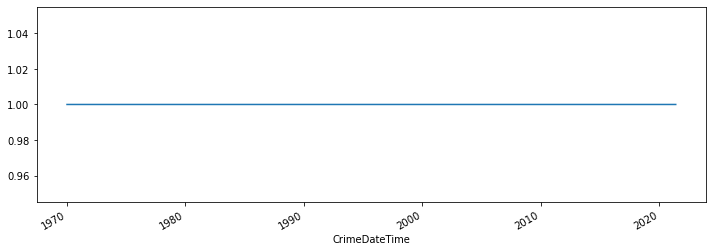

In [13]:
## Plot the ts
ts.plot()

#### Q: What went wrong? What are we looking at?

- 

## Time Series Frequencies & Resampling

In [14]:
## Resample to daily data ("D")
ts = ts.resample("D").sum()
ts

CrimeDateTime
1970-01-01 00:00:00+00:00    11
1970-01-02 00:00:00+00:00     0
1970-01-03 00:00:00+00:00     0
1970-01-04 00:00:00+00:00     0
1970-01-05 00:00:00+00:00     0
                             ..
2021-05-18 00:00:00+00:00     3
2021-05-19 00:00:00+00:00     0
2021-05-20 00:00:00+00:00     3
2021-05-21 00:00:00+00:00     2
2021-05-22 00:00:00+00:00     1
Freq: D, Name: SHOOTING, Length: 18770, dtype: int64

In [15]:
## Check the index, whats different?
ts.index

DatetimeIndex(['1970-01-01 00:00:00+00:00', '1970-01-02 00:00:00+00:00',
               '1970-01-03 00:00:00+00:00', '1970-01-04 00:00:00+00:00',
               '1970-01-05 00:00:00+00:00', '1970-01-06 00:00:00+00:00',
               '1970-01-07 00:00:00+00:00', '1970-01-08 00:00:00+00:00',
               '1970-01-09 00:00:00+00:00', '1970-01-10 00:00:00+00:00',
               ...
               '2021-05-13 00:00:00+00:00', '2021-05-14 00:00:00+00:00',
               '2021-05-15 00:00:00+00:00', '2021-05-16 00:00:00+00:00',
               '2021-05-17 00:00:00+00:00', '2021-05-18 00:00:00+00:00',
               '2021-05-19 00:00:00+00:00', '2021-05-20 00:00:00+00:00',
               '2021-05-21 00:00:00+00:00', '2021-05-22 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=18770, freq='D')

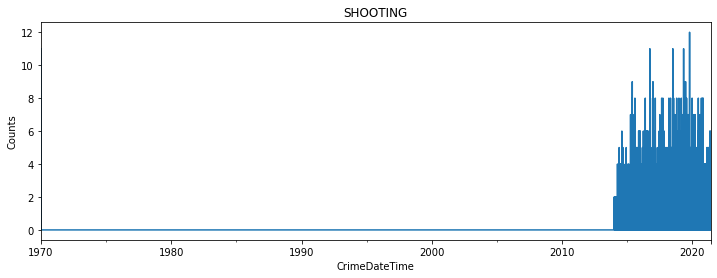

In [16]:
## PLot the time series
ax = ts.plot(title=ts.name,ylabel='Counts');

>#### Q: It worked! But whats the issue?

## Slicing With Time Series

- Make sure your index is sorted first'
- Use `.loc` with dates as strings for slicing

<AxesSubplot:xlabel='CrimeDateTime'>

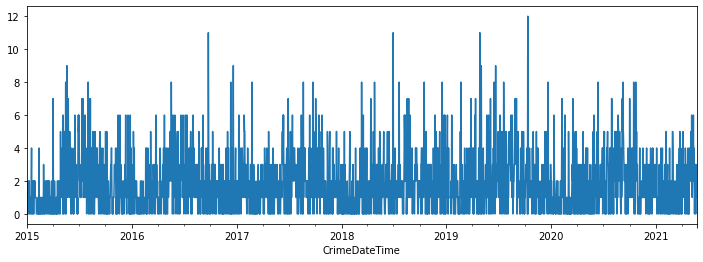

In [17]:
## Slice out dates prior to rise in daily counts
ts = ts.sort_index().loc['2015':]
ts.plot()

>#### Much better! sort of... but whats the issue now?

### Time series Frequencies


- We want the daily counts for our crimes.
    - In order to do so we have to resample the ts using the correct frequency alias.
- For time series modeling, we will need our time series as a specific frequency without missing data.

#### Pandas Frequency Aliases

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases


|Alias	| Description|
| --- | --- |
|B |	business day frequency|
|C |	custom business day frequency|
|D |	calendar day frequency|
|W |	weekly frequency|
|M |	month end frequency|
|SM |	semi-month end frequency (15th and end of month)|
|BM |	business month end frequency|
|CBM |	custom business month end frequency|
|MS |	month start frequency|
|SMS |	semi-month start frequency (1st and 15th)|
|BMS |	business month start frequency|
|CBMS |	custom business month start frequency|
|Q |	quarter end frequency|
|BQ |	business quarter end frequency|
|QS |	quarter start frequency|
|BQS |	business quarter start frequency|
|A, Y |	year end frequency|
|BA, BY |	business year end frequency|
|AS, YS |	year start frequency|
|BAS, BYS |	business year start frequency|
|BH | business hour frequency|
|H | hourly frequency|
|T |  min	minutely frequency|
|S | secondly frequency|
|L |  ms	milliseconds|
|U |  us	microseconds|
|N | nanoseconds|

#### Compare Resampled ts

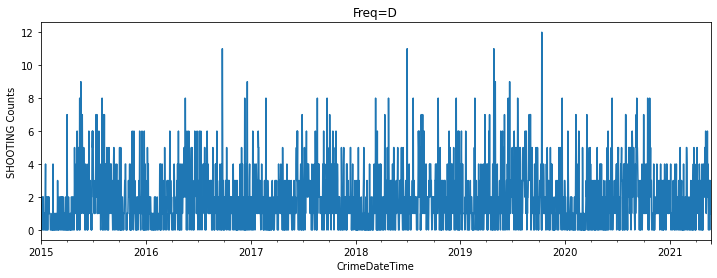

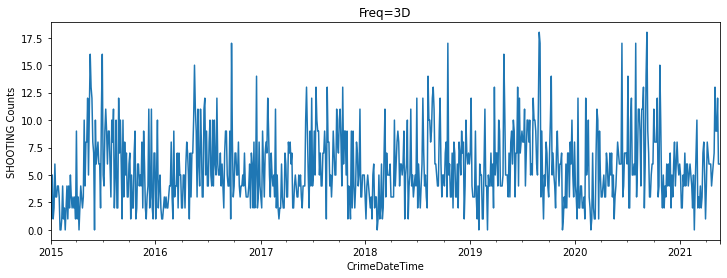

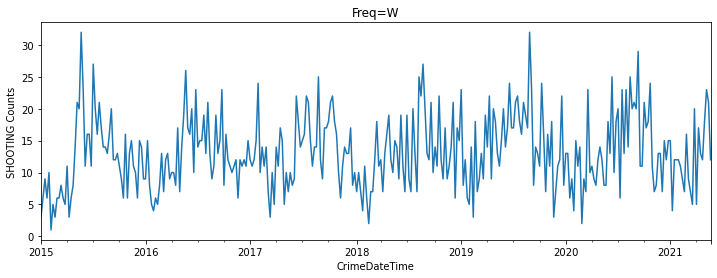

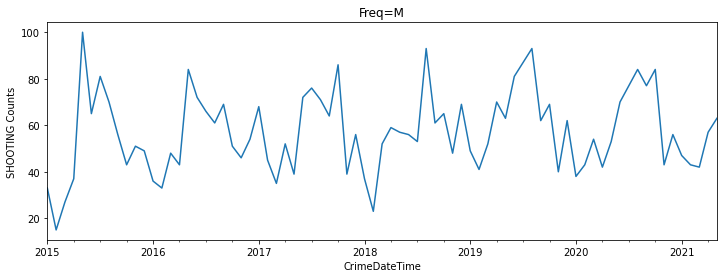

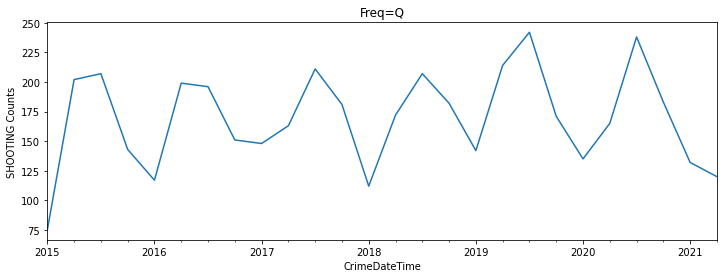

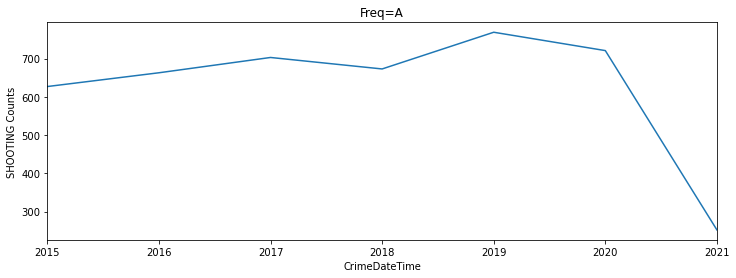

In [18]:
## Plot the same ts as different frequencies
## Specify freq codes daily, every 3 days, weekly, Monthly, Quarterly, yearly
freq_codes = ['D','3D','W','M','Q','A']

## select ts from CRIMES
ts = CRIMES['SHOOTING'].sort_index().loc['2015':]

## For each freq code, resample and plot
for freq in freq_codes:
    
    fig = plt.figure()
    ts.resample(freq).sum().plot(title=f"Freq={freq}", 
                                ylabel=f"{ts.name} Counts")


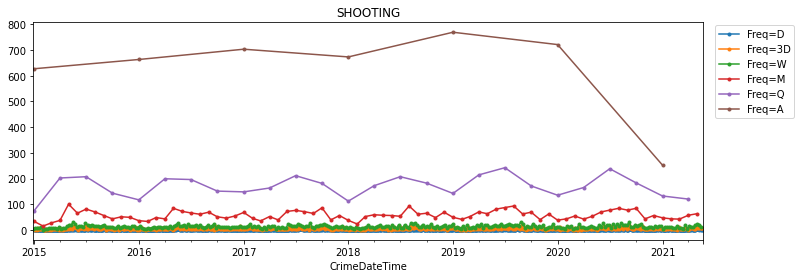

In [19]:
## Repeat the above loop,but plot it all on one figure
crime = 'SHOOTING'
## Specify freq codes
freq_codes = ['D','3D','W','M','Q','A']

## select ts from CRIMES
ts = CRIMES[crime].loc['2015':]

## For each freq code, resample and plot
for freq in freq_codes:
    
    ax = ts.resample(freq).sum().plot(marker='.',label=f"Freq={freq}")
ax.set_title(ts.name)
ax.legend(bbox_to_anchor=[1.01,1.01],loc='upper left')

## Visualize all CRIMES as "D" Freq

>- **Loop through all CRIMES, slice out 2015-Present, and resample as "D"**
    - We can always downsample without issue, but upsampling is a problematic

### Using Dictionaries for TIme Series preprocessing

In [20]:
## Save all crimes from 2015 on with freq=D in new TS dict
TS= {}

## For each crime
for crime,ts in CRIMES.items():
    
    ## Resample and slice and save ts
    TS[crime] = ts.sort_index().loc['2015':].resample('D').sum()
    
TS.keys()

dict_keys(['HOMICIDE', 'AGG. ASSAULT', 'COMMON ASSAULT', 'LARCENY', 'AUTO THEFT', 'ROBBERY - CARJACKING', 'BURGLARY', 'LARCENY FROM AUTO', 'ROBBERY - COMMERCIAL', 'SHOOTING', 'ROBBERY - RESIDENCE', 'ROBBERY - STREET', 'ARSON', 'RAPE'])

In [21]:
## Check shooting
TS['SHOOTING']


CrimeDateTime
2015-01-01 00:00:00+00:00    2
2015-01-02 00:00:00+00:00    0
2015-01-03 00:00:00+00:00    1
2015-01-04 00:00:00+00:00    0
2015-01-05 00:00:00+00:00    0
                            ..
2021-05-18 00:00:00+00:00    3
2021-05-19 00:00:00+00:00    0
2021-05-20 00:00:00+00:00    3
2021-05-21 00:00:00+00:00    2
2021-05-22 00:00:00+00:00    1
Freq: D, Name: SHOOTING, Length: 2334, dtype: int64

### Now that we have the same frequency for each crime series, make them into a dataframe

In [22]:
## Concatenate all ts together into one ts_df
ts_df = pd.concat(TS,axis=1)
ts_df.head()

,HOMICIDE,AGG. ASSAULT,COMMON ASSAULT,LARCENY,AUTO THEFT,ROBBERY - CARJACKING,BURGLARY,LARCENY FROM AUTO,ROBBERY - COMMERCIAL,SHOOTING,ROBBERY - RESIDENCE,ROBBERY - STREET,ARSON,RAPE
CrimeDateTime,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,NaN,19,28,39,15,1,24,17,1,2,2.0,9.0,1.0,3.0
2015-01-02 00:00:00+00:00,NaN,3,7,32,9,1,22,12,5,0,6.0,10.0,0.0,1.0
2015-01-03 00:00:00+00:00,3.0,8,11,11,10,0,10,9,0,1,2.0,7.0,2.0,0.0
2015-01-04 00:00:00+00:00,2.0,6,15,20,11,1,5,22,2,0,1.0,11.0,0.0,0.0
2015-01-05 00:00:00+00:00,1.0,7,15,32,10,1,22,24,2,0,4.0,3.0,0.0,1.0


### Visualize all ts with the differnet requency codes

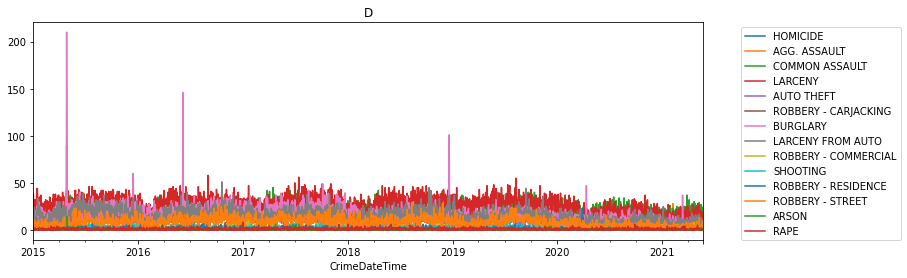

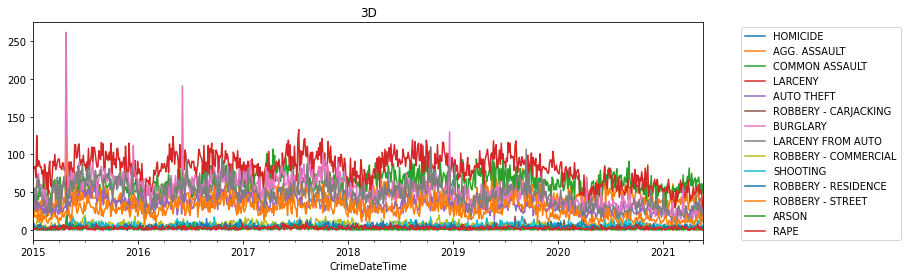

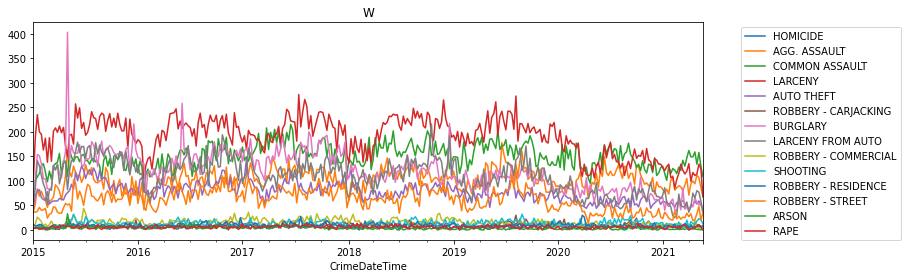

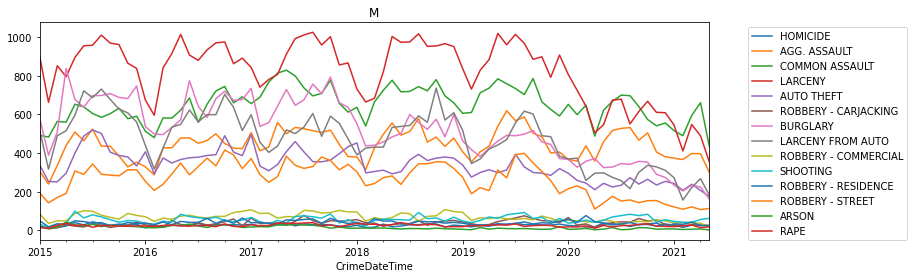

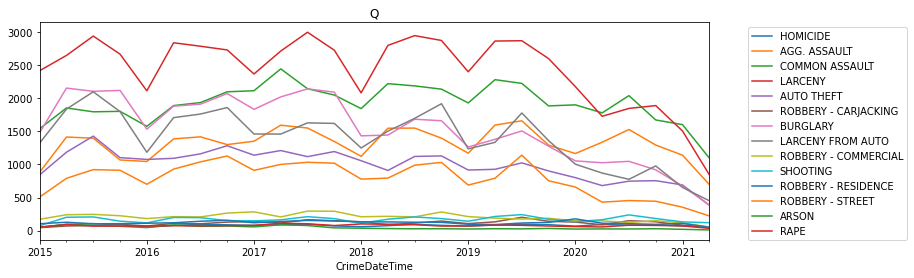

In [23]:
## Plot the same ts as different frequencies
freq_codes = ['D','3D','W','M','Q']

for freq in freq_codes:
#     fig, ax = plt.subplots()

    ax = ts_df.resample(freq).sum().plot(title=freq)
        
    ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')

### Dealing with Null Values 

In [24]:
## Check For Null Values
ts_df.isna().sum()

HOMICIDE                2
AGG. ASSAULT            0
COMMON ASSAULT          0
LARCENY                 0
AUTO THEFT              0
ROBBERY - CARJACKING    0
BURGLARY                0
LARCENY FROM AUTO       0
ROBBERY - COMMERCIAL    0
SHOOTING                0
ROBBERY - RESIDENCE     1
ROBBERY - STREET        1
ARSON                   4
RAPE                    6
dtype: int64

In [25]:
# save a T/F index for if a row has any nulls
null_rows = ts_df.isna().any(axis=1)

# check out the null rows
ts_df[null_rows]

,HOMICIDE,AGG. ASSAULT,COMMON ASSAULT,LARCENY,AUTO THEFT,ROBBERY - CARJACKING,BURGLARY,LARCENY FROM AUTO,ROBBERY - COMMERCIAL,SHOOTING,ROBBERY - RESIDENCE,ROBBERY - STREET,ARSON,RAPE
CrimeDateTime,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,NaN,19,28,39,15,1,24,17,1,2,2.0,9.0,1.0,3.0
2015-01-02 00:00:00+00:00,NaN,3,7,32,9,1,22,12,5,0,6.0,10.0,0.0,1.0
2021-05-17 00:00:00+00:00,3.0,14,25,12,5,2,11,12,1,3,0.0,6.0,0.0,NaN
2021-05-18 00:00:00+00:00,0.0,9,12,19,8,0,9,5,1,3,2.0,5.0,2.0,NaN
2021-05-19 00:00:00+00:00,1.0,7,24,12,10,1,6,5,0,0,2.0,6.0,NaN,NaN
2021-05-20 00:00:00+00:00,0.0,15,15,14,5,3,10,6,2,3,1.0,10.0,NaN,NaN
2021-05-21 00:00:00+00:00,2.0,11,19,6,9,1,3,4,1,2,1.0,9.0,NaN,NaN
2021-05-22 00:00:00+00:00,2.0,11,14,5,5,1,3,1,1,1,NaN,NaN,NaN,NaN


#### Q: what do we notice about our null values? Where are they?

> - We have several options for filling in null values for time series, based on what would be best for our data.

In [26]:
## FFill null values with the next non-null value
ts_df.bfill()[null_rows]

,HOMICIDE,AGG. ASSAULT,COMMON ASSAULT,LARCENY,AUTO THEFT,ROBBERY - CARJACKING,BURGLARY,LARCENY FROM AUTO,ROBBERY - COMMERCIAL,SHOOTING,ROBBERY - RESIDENCE,ROBBERY - STREET,ARSON,RAPE
CrimeDateTime,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,3.0,19,28,39,15,1,24,17,1,2,2.0,9.0,1.0,3.0
2015-01-02 00:00:00+00:00,3.0,3,7,32,9,1,22,12,5,0,6.0,10.0,0.0,1.0
2021-05-17 00:00:00+00:00,3.0,14,25,12,5,2,11,12,1,3,0.0,6.0,0.0,NaN
2021-05-18 00:00:00+00:00,0.0,9,12,19,8,0,9,5,1,3,2.0,5.0,2.0,NaN
2021-05-19 00:00:00+00:00,1.0,7,24,12,10,1,6,5,0,0,2.0,6.0,NaN,NaN
2021-05-20 00:00:00+00:00,0.0,15,15,14,5,3,10,6,2,3,1.0,10.0,NaN,NaN
2021-05-21 00:00:00+00:00,2.0,11,19,6,9,1,3,4,1,2,1.0,9.0,NaN,NaN
2021-05-22 00:00:00+00:00,2.0,11,14,5,5,1,3,1,1,1,NaN,NaN,NaN,NaN


In [27]:
## FFill null values with the previous non-null value
ts_df.ffill()[null_rows]

,HOMICIDE,AGG. ASSAULT,COMMON ASSAULT,LARCENY,AUTO THEFT,ROBBERY - CARJACKING,BURGLARY,LARCENY FROM AUTO,ROBBERY - COMMERCIAL,SHOOTING,ROBBERY - RESIDENCE,ROBBERY - STREET,ARSON,RAPE
CrimeDateTime,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,NaN,19,28,39,15,1,24,17,1,2,2.0,9.0,1.0,3.0
2015-01-02 00:00:00+00:00,NaN,3,7,32,9,1,22,12,5,0,6.0,10.0,0.0,1.0
2021-05-17 00:00:00+00:00,3.0,14,25,12,5,2,11,12,1,3,0.0,6.0,0.0,1.0
2021-05-18 00:00:00+00:00,0.0,9,12,19,8,0,9,5,1,3,2.0,5.0,2.0,1.0
2021-05-19 00:00:00+00:00,1.0,7,24,12,10,1,6,5,0,0,2.0,6.0,2.0,1.0
2021-05-20 00:00:00+00:00,0.0,15,15,14,5,3,10,6,2,3,1.0,10.0,2.0,1.0
2021-05-21 00:00:00+00:00,2.0,11,19,6,9,1,3,4,1,2,1.0,9.0,2.0,1.0
2021-05-22 00:00:00+00:00,2.0,11,14,5,5,1,3,1,1,1,1.0,9.0,2.0,1.0


In [28]:
## We have crime counts, so it makes sense to fill with 0
ts_df.fillna(0,inplace=True)
ts_df.isna().sum()

HOMICIDE                0
AGG. ASSAULT            0
COMMON ASSAULT          0
LARCENY                 0
AUTO THEFT              0
ROBBERY - CARJACKING    0
BURGLARY                0
LARCENY FROM AUTO       0
ROBBERY - COMMERCIAL    0
SHOOTING                0
ROBBERY - RESIDENCE     0
ROBBERY - STREET        0
ARSON                   0
RAPE                    0
dtype: int64

In [29]:
## Save df to csv for time series modeling next class
ts_df.to_csv('baltimore_crime_counts_2021.csv')

# Time Series Trends

## Types of Trends

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-removing-trends-online-ds-ft-100719/master/images/new_trendseasonal.png" width=80%>

### Stationarity

<div style="text-align:center;font-size:2em">Mean</div>
    
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_mean_nonstationary.png" width=70%>
<br><br>
<div style="text-align:center;font-size:3em">Variance</div>
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_cov_nonstationary.png" width=70%>
</div>

## Detecting Trends

<AxesSubplot:xlabel='CrimeDateTime'>

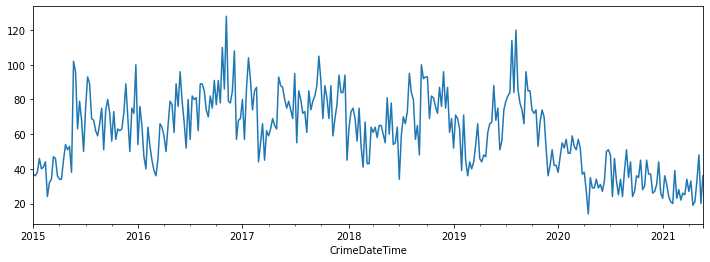

In [30]:
## Grab ROBBERY - STREET and resample as weekly data
ts = ts_df['ROBBERY - STREET'].resample('W').sum()#.loc['2016':]
ts.plot()

### Augmented Dickey Fuller Test for Stationarity

In [31]:
## Lab Function
# from statsmodels.tsa.stattools import adfuller

def adfuller_test_df(ts,index=['AD Fuller Results']):
    """Returns the AD Fuller Test Results and p-values for the null hypothesis
    that there the data is non-stationary (that there is a unit root in the data)"""
    
    df_res = tsa.stattools.adfuller(ts)
    
    names = ['Test Statistic','p-value','#Lags Used','# of Observations Used']
    res  = dict(zip(names,df_res[:4]))
    
    res['p<.05'] = res['p-value']<.05
    res['Stationary?'] = res['p<.05']
    
    if isinstance(index,str):
        index = [index]
    res_df = pd.DataFrame(res,index=index)
    res_df = res_df[['Test Statistic','#Lags Used',
                     '# of Observations Used','p-value','p<.05',
                    'Stationary?']]
    return res_df



def stationarity_check(TS,window=8,plot=True,index=['AD Fuller Results']):
    """Adapted from https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution"""
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=window, center=False).mean()
    roll_std = TS.rolling(window=window, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller_test_df(TS,index=index)
    
    if plot:
        # Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        plt.plot(TS, color='blue',label=f'Original (freq={TS.index.freq})')
        plt.plot(roll_mean, color='red', label=f'Rolling Mean (window={window})')
        plt.plot(roll_std, color='black', label = f'Rolling Std (window={window})')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        display(dftest)
        plt.show(block=False)
        
    return dftest
    

,Test Statistic,#Lags Used,# of Observations Used,p-value,p<.05,Stationary?
AD Fuller Results,-2.536828,5,328,0.106769,False,False


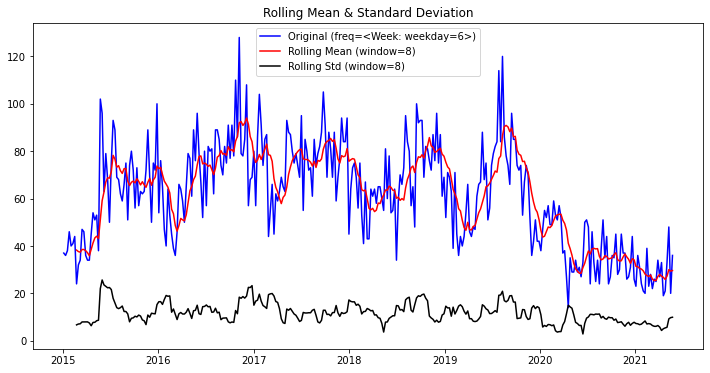

In [32]:
res = stationarity_check(ts);

## Removing Trends 

- For time series modeling, we will want to get our time series stationary.*

#### Trend Removal Methods
- Differencing (`.diff()`)
- Log-Transformation (`np.log`)
- Subtract Rolling Mean (`ts-ts.rolling().mean()`)
- Subtract Exponentially-Weighted Mean (`ts-ts.ewm().mean()`)
- Seasonal Decomposition (`from statsmodels.tsa.seasonal import seasonal_decompose`
)

_`*`=caveat to be discussed tomorrow_

,Test Statistic,#Lags Used,# of Observations Used,p-value,p<.05,Stationary?
AD Fuller Results,-2.536828,5,328,0.106769,False,False


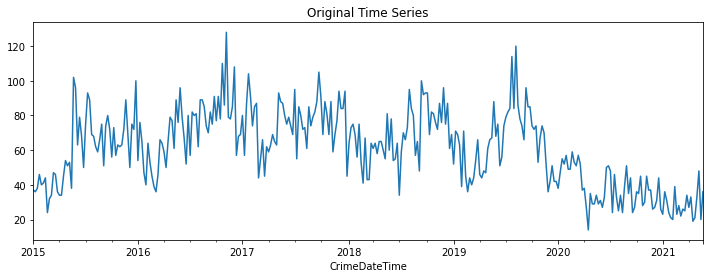

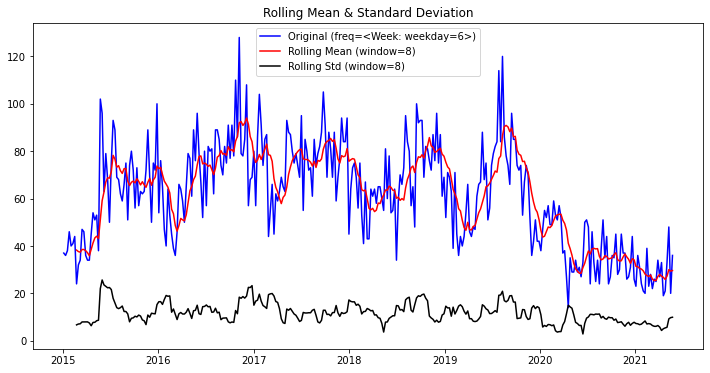

,Test Statistic,#Lags Used,# of Observations Used,p-value,p<.05,Stationary?
AD Fuller Results,-2.536828,5,328,0.106769,False,False


In [33]:
## Plot Original Time Series and Check for Stationarity
ts.plot(title='Original Time Series')
stationarity_check(ts)

,Test Statistic,#Lags Used,# of Observations Used,p-value,p<.05,Stationary?
AD Fuller Results,-10.712012,5,328,3.313361e-19,True,True


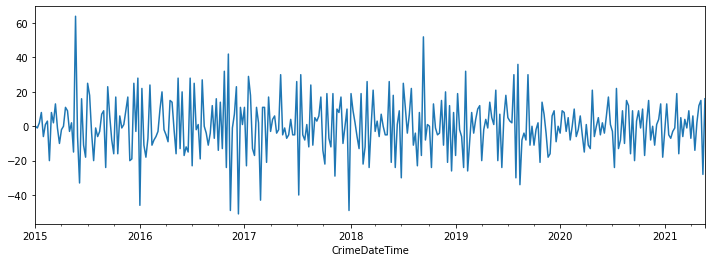

In [34]:
## Apply differnncing, plot and get adfuller test
ts_diff = ts.diff().fillna(0)
ts_diff.plot()
adfuller_test_df(ts_diff)

,Test Statistic,#Lags Used,# of Observations Used,p-value,p<.05,Stationary?
AD Fuller Results,-2.05822,5,328,0.261643,False,False


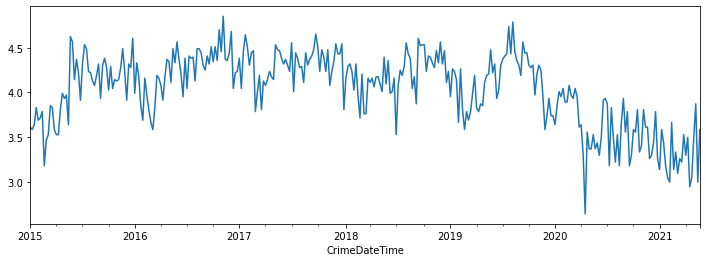

In [35]:
## Log Transform, plot and get adfuller test
ts_log = np.log(ts)
ts_log.plot()
adfuller_test_df(ts_log)

,Test Statistic,#Lags Used,# of Observations Used,p-value,p<.05,Stationary?
AD Fuller Results,-11.129461,3,326,3.310070e-20,True,True


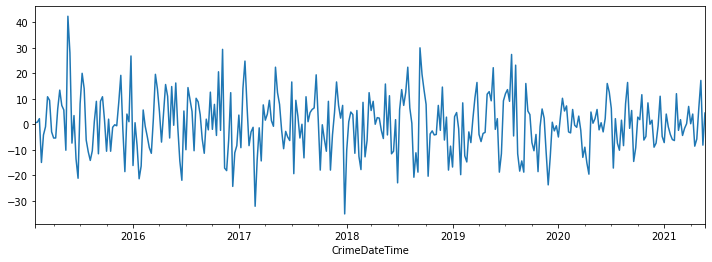

In [36]:
## Subtract Rolling mean
ts_rolling = (ts - ts.rolling(5).mean()).dropna()
ts_rolling.plot()
adfuller_test_df(ts_rolling)

,Test Statistic,#Lags Used,# of Observations Used,p-value,p<.05,Stationary?
AD Fuller Results,-9.414725,1,332,5.709790e-16,True,True


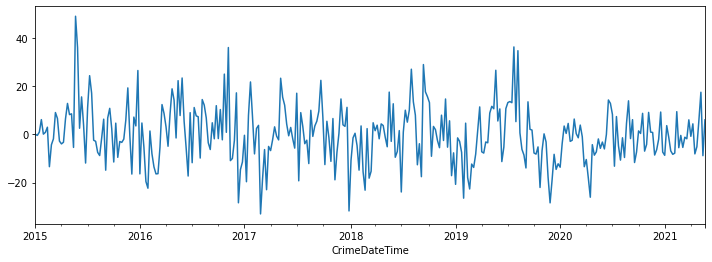

In [37]:
## Subtract Exponentially Weight Mean Rolling mean
ts_ewm = (ts - ts.ewm(halflife=4).mean()).fillna(0)
ts_ewm.plot()
adfuller_test_df(ts_ewm)

#### Q: What do we notice? What methods achieved stationarity?

### Seasonal Decomposition

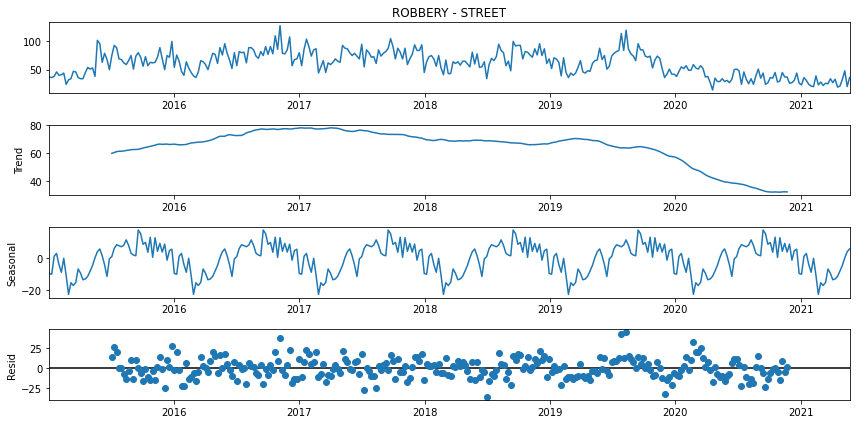

In [38]:
## Use seasonal decompose on the ts and plot
plt.rcParams['figure.figsize']=(12,6)

decomp = tsa.seasonal_decompose(ts)
decomp.plot();

#### Checking which components are stationary

In [39]:

## Save seasonal/trend/resid in a dictionary.
decomp_dict = {'seasonal':decomp.seasonal,
          'trend':decomp.trend,
          'resid':decomp.resid}


In [40]:
## Make a list of adfuller results to append
decomp_stationarity = []

## Save results of orig ts
decomp_stationarity.append( adfuller_test_df(ts,index='Original'))

## Loop through decomp dict, 
for trend,ts_trend in decomp_dict.items():
    # Fill any missing values, get adfuller result
    ts_trend = ts_trend.fillna(0)
    res =adfuller_test_df(ts_trend, index=[trend])
    
    ## Append res to decomp_stationary
    decomp_stationarity.append(res)

## make into a df
res_df = pd.concat(decomp_stationarity)
res_df

,Test Statistic,#Lags Used,# of Observations Used,p-value,p<.05,Stationary?
Original,-2.536828,5,328,1.067687e-01,False,False
seasonal,-6.714773,17,316,3.605148e-09,True,True
trend,-1.319885,0,333,6.200265e-01,False,False
resid,-8.510789,1,332,1.169019e-13,True,True


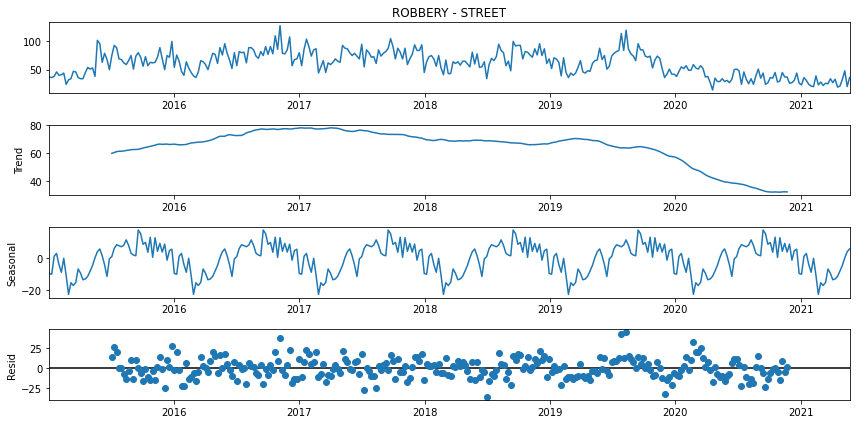

In [41]:
decomp.plot();

### Summary

- Tomorrow we will continue working with the dataset we processed today for time series modeling. 

# APPENDIX

In [42]:
# ts_q = ts.to_frame()

# ts_q#.plot()

In [43]:
 # Use pandas grouper to group values using annual frequency
# year_groups = ts_q.groupby(pd.Grouper(freq ='A'))

In [44]:
# # Create a new DataFrame and store yearly values in columns 
# ts_annual = pd.DataFrame()

# for yr, group in year_groups:
# #     display(group.values)
# #     ts_annual[yr.year] = group.values.ravel()
    
# # Plot the yearly groups as subplots
# # ts_annual.plot(figsize = (13,8), subplots=True, legend=True);

### Date Str Formatting




Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    